# Tutorial 05

In [1]:
# Importing packages
import time
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib notebook

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] =120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

from IPython.core.display import display, HTML, Latex

## 4 Gaussians

In [2]:
centers = np.array([[3, 3], [3, -3], [-3, 3], [-3, -3]])
std = 1

n_points = 100

x = (np.random.randn(centers.shape[0], n_points, 2) * std + centers[:, None, :]).reshape(-1, 2)

In [84]:
ax.collections

[]

<IPython.core.display.Javascript object>


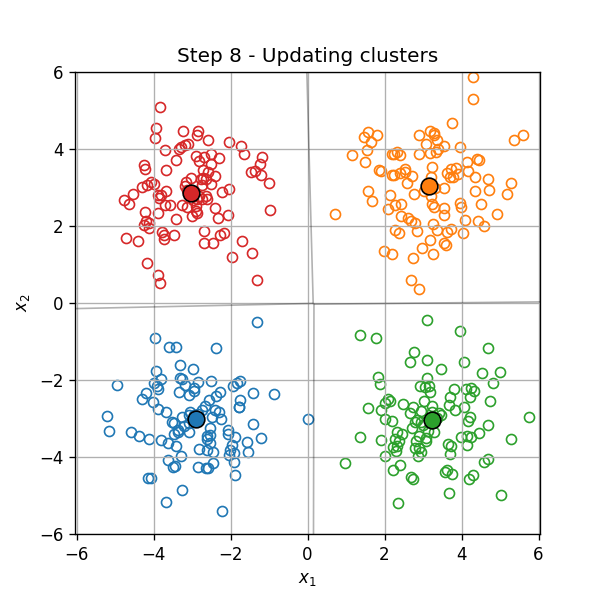

In [103]:
## Prepare figure and plotting counters
fig, ax = plt.subplots(figsize=(5, 5))
raw_points = ax.plot(x[:, 0], x[:, 1], 'o', fillstyle='none')[0]
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.axis('equal')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Data Points')

fig.savefig('../media/gaussians_data.png')

In [104]:
from scipy.spatial import distance  # A function for efficiently calculating all the distances between points in two lists of points.
from scipy.spatial import Voronoi, voronoi_plot_2d  # Functions for plotting the Voronoi cells

## Set K
k = 4

n_samples = len(x)

## Create a random generator using a fixed seed (we fix the seed for reproducible results)
rand_gen = np.random.RandomState(4)

## Initialize the means using k random points from the dataset
means = x[rand_gen.randint(low=0, high=n_samples, size=k)]
assignment = np.zeros(n_samples, dtype=int)

## Prepare figure
raw_points.remove()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
clusters_points = [ax.plot([], [], 
                           'o',
                           fillstyle='none',
                           color=colors[i_cluster],
                           zorder=1,
                           )[0] for i_cluster in range(k)] 
centers_points = [ax.plot(means[i_cluster, 0], means[i_cluster, 1],
                          'o',
                          markersize=10,
                          color=colors[i_cluster],
                          mec='black',
                          zorder=2,
                          )[0] for i_cluster in range(k)]
arrows = [None] * 4

## Plot initial Voronoi cells
vor = Voronoi(np.concatenate([means, [[1e3, 1e3], [1e3, -1e3], [-1e3, 1e3], [-1e3, -1e3]]], axis=0))
voronoi_plot_2d(ax=ax, vor=vor, show_points=False, show_vertices=False, line_width=1, line_alpha=0.3)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

i_step = 0
while True:
    i_step += 1
    assignment_old = assignment

    ## Step 1: Assign points to means
    distances = distance.cdist(x, means, 'euclidean')
    assignment = np.argmin(distances, axis=1)

    ## Plot clusters
    ax.set_title('Step {} - Updating clusters'.format(i_step))
    for i_cluster in range(k):
        cluster_indices = assignment == i_cluster
        clusters_points[i_cluster].set_data(x[cluster_indices, 0], x[cluster_indices, 1])
        if arrows[i_cluster] is not None:
            arrows[i_cluster].remove()
            arrows[i_cluster] = None
    fig.canvas.draw()
    fig.savefig('../media/gaussians_step{}a.png'.format(i_step))
    time.sleep(1)
    
    ## Stop criteria
    if (assignment == assignment_old).all():
        break

    ## Step 2: Update means
    old_means = means.copy()  ## needed just for plotting
    for i_cluster in range(k):
        cluster_indices = assignment == i_cluster
        means[i_cluster] = x[cluster_indices].mean(axis=0)

    ## Plot means
    ax.set_title('Step {} - Updating centers'.format(i_step))
    for i_cluster in range(k):
        cluster_indices = assignment == i_cluster
        centers_points[i_cluster].set_data(means[i_cluster, 0], means[i_cluster, 1])
        if (old_means[i_cluster]  != means[i_cluster]).any():
            arrows[i_cluster] = ax.arrow(old_means[i_cluster, 0], old_means[i_cluster, 1],
                                         means[i_cluster, 0] - old_means[i_cluster, 0],
                                         means[i_cluster, 1] - old_means[i_cluster, 1],
                                         head_width=0.2,
                                         head_length=0.2,
                                         color='black',
                                         length_includes_head=True,
                                         zorder=3,
                                         )

    ## Update Voronoi cells on plot
    while(len(ax.collections)):
        ax.collections[-1].remove()
    vor = Voronoi(np.concatenate([means, [[1e3, 1e3], [1e3, -1e3], [-1e3, 1e3], [-1e3, -1e3]]], axis=0))
    voronoi_plot_2d(ax=ax, vor=vor, show_points=False, show_vertices=False, line_width=1, line_alpha=0.3)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    fig.canvas.draw()
    time.sleep(1)
    fig.savefig('../media/gaussians_step{}b.png'.format(i_step))

In [102]:
## Save plot of clusters only
ax.set_title('Clustered data Points')
for point in centers_points:
    point.remove()
while(len(ax.collections)):
    ax.collections[-1].remove()
fig.canvas.draw()
fig.savefig('../media/gaussians_clusters.png')

## Results for different K's

<IPython.core.display.Javascript object>


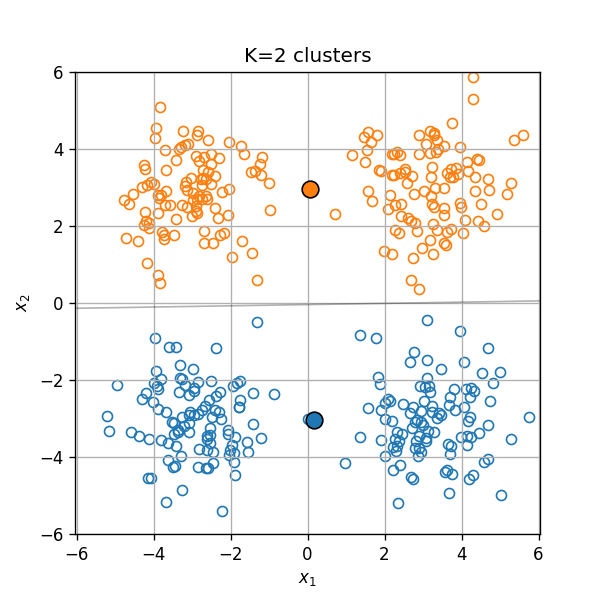

<IPython.core.display.Javascript object>


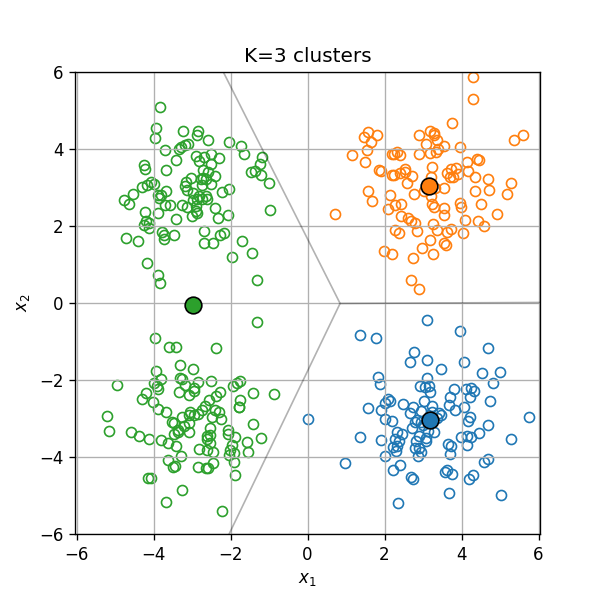

<IPython.core.display.Javascript object>


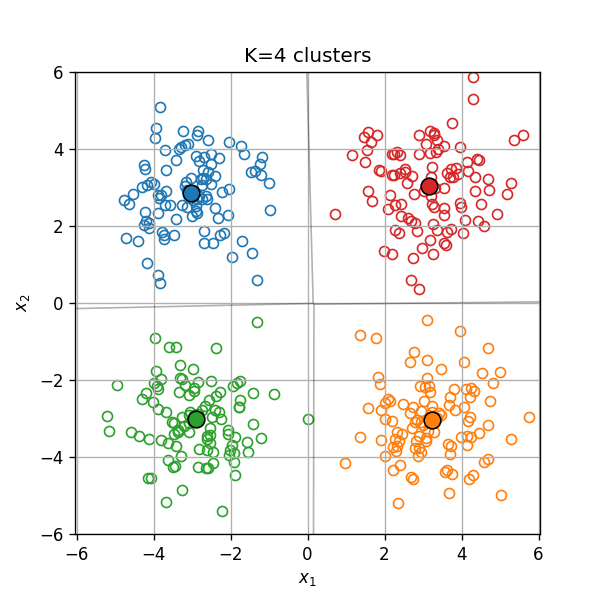

<IPython.core.display.Javascript object>


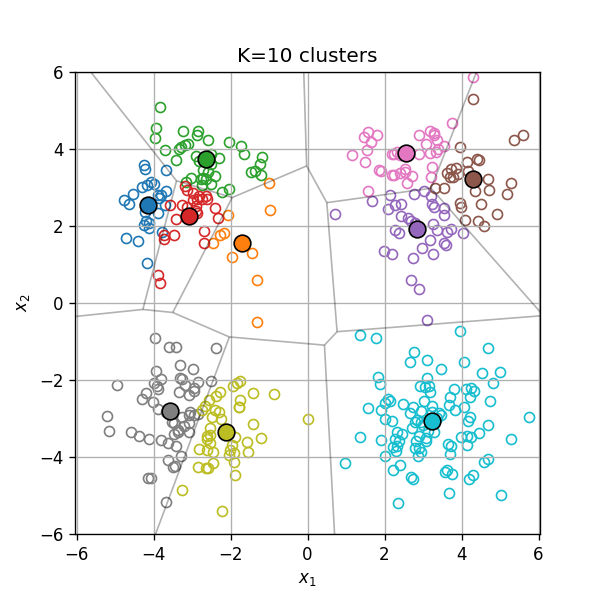

In [117]:
rand_gen = np.random.RandomState(0)

for k in [2, 3, 4, 10]:
    ## Initialize the means using k random points from the dataset
    means = x[rand_gen.randint(low=0, high=n_samples, size=k)]
    assignment = np.zeros(n_samples, dtype=int)

    i_step = 0
    while True:
        i_step += 1
        assignment_old = assignment

        ## Step 1: Assign points to means
        distances = distance.cdist(x, means, 'euclidean')
        assignment = np.argmin(distances, axis=1)

        ## Stop criteria
        if (assignment == assignment_old).all():
            break

        ## Step 2: Update means
        old_means = means.copy()  ## needed just for plotting
        for i_cluster in range(k):
            cluster_indices = assignment == i_cluster
            means[i_cluster] = x[cluster_indices].mean(axis=0)

    ## Plot results
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axis('equal')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('K={} clusters'.format(k))

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:k]
    for i_cluster in range(k):
        cluster_indices = assignment == i_cluster
        ax.plot(x[cluster_indices, 0], x[cluster_indices, 1],
            'o',
            fillstyle='none',
            color=colors[i_cluster],
            zorder=1,
            )
        ax.plot(means[i_cluster, 0], means[i_cluster, 1],
            'o',
            markersize=10,
            color=colors[i_cluster],
            mec='black',
            zorder=2,
            )

    vor = Voronoi(np.concatenate([means, [[1e3, 1e3], [1e3, -1e3], [-1e3, 1e3], [-1e3, -1e3]]], axis=0))
    voronoi_plot_2d(ax=ax, vor=vor, show_points=False, show_vertices=False, line_width=1, line_alpha=0.3)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    fig.savefig('../media/gaussians_{}_clusters.png'.format(k))

In [ ]:
rand_gen = np.random.RandomState(1)

k_vec = np.arange(1, 400)
err_vec = np.zeros(k_vec.shape)

for i_k, k in enumerate(k_vec):
    ## Initialize the means using k random points from the dataset
    means = x[rand_gen.randint(low=0, high=n_samples, size=k)]
    assignment = np.zeros(n_samples, dtype=int)

    i_step = 0
    while True:
        i_step += 1
        assignment_old = assignment

        ## Step 1: Assign points to means
        distances = distance.cdist(x, means, 'euclidean')
        assignment = np.argmin(distances, axis=1)

        ## Stop criteria
        if (assignment == assignment_old).all():
            break

        ## Step 2: Update means
        old_means = means.copy()  ## needed just for plotting
        for i_cluster in range(k):
            cluster_indices = assignment == i_cluster
            if np.any(cluster_indices):
                means[i_cluster] = x[cluster_indices].mean(axis=0)
    
    err_vec[i_k] = np.mean(((x - means[assignment]) ** 2).sum(axis=1)) ** 0.5

<IPython.core.display.Javascript object>


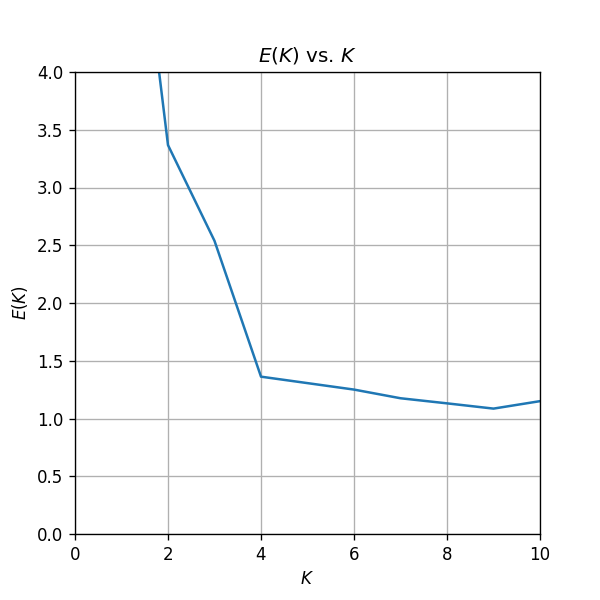

In [170]:
## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('$K$')
ax.set_ylabel('$E\\left(K\\right)$')
ax.set_title('$E\\left(K\\right)$ vs. $K$')

ax.plot(k_vec, err_vec)

fig.savefig('../media/ek_vs_k.png'.format(k))

ax.set_xlim(0, 10)
ax.set_ylim(0, 4)

fig.savefig('../media/ek_vs_k_zoom.png'.format(k))

<IPython.core.display.Javascript object>


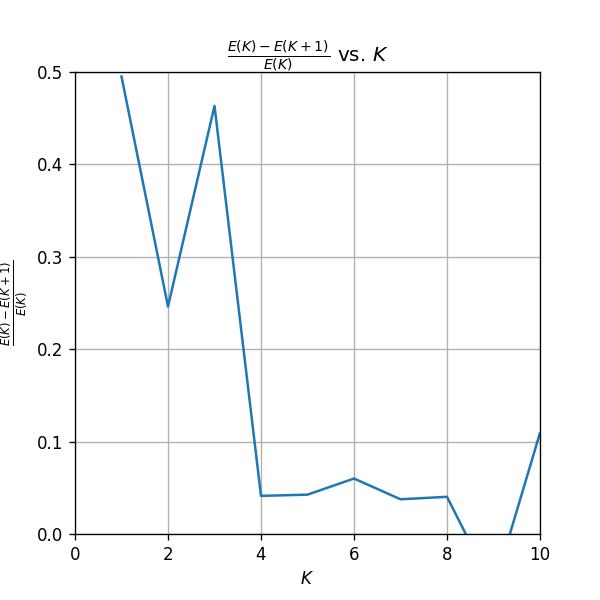

In [171]:
err_vec_rel = (err_vec[:-1] - err_vec[1:]) / err_vec[:-1]

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('$K$')
ax.set_ylabel('$\\frac{E\\left(K\\right)-E\\left(K+1\\right)}{E\\left(K\\right)}$')
ax.set_title('$\\frac{E\\left(K\\right)-E\\left(K+1\\right)}{E\\left(K\\right)}$ vs. $K$')

ax.plot(k_vec[:-1], err_vec_rel)

fig.savefig('../media/ek_rel_vs_k.png'.format(k))

ax.set_xlim(0, 10)
ax.set_ylim(0, 0.5)

fig.savefig('../media/ek_rel_vs_k_zoom.png'.format(k))

In [ ]:
## P_{X,Y} joint distribution
## --------------------------
x_values = y_values = np.array([0, 1, 2, 3])
p_xy = pd.DataFrame([[0   , 0.15, 0.2   , 0.05],
                     [0.08, 0.03, np.nan, 0.04],
                     [0.02, 0.03, 0.04  , 0.01],
                     [0.1 , 0.05, 0.05  , 0.1 ]],
                     index=[0, 1, 2, 3],
                     columns=[0, 1, 2, 3])
display(HTML(p_xy.to_html()))

### Ex. 1.2a

Calcualting $p_{X,Y}\left(1,2\right)$

In [ ]:
p_xy.loc[1, 2] = 1 - np.nansum(p_xy)
display(
    Latex(r'$p_{{X,Y}}\left(1,2\right)={:.3}$'.format(p_xy.loc[1, 2])),
    Latex(r'$p_{{X,Y}}$:'),
    HTML(p_xy.to_html()),
    )

### Ex 1.2b
Calculating $p_{X\lvert Y}\left(1\lvert Y=0\right)$

In [ ]:
p_x_given_y_1_0 = p_xy.loc[1, 0] / p_xy.loc[:, 0].sum()
display(Latex(r'$p_{{X\lvert Y}}\left(1\lvert Y=0\right)={:.3}$'.format(p_x_given_y_1_0)))

### Ex 1.2c

Calcualting $p_X\left(x\right)$

In [ ]:
p_x = p_xy.sum(axis=1)
display(
    Latex(r'$p_{{X}}\left(x\right)$:'),
    HTML(p_x.to_frame().to_html())
    )

Calculating $Pr\left(X_1+X_2=3\right)$

In [ ]:
prob3 = np.sum([p_x[x1] * p_x[3 - x1] for x1 in range(4)])
display(Latex(r'$Pr\left(X_1+X_2=3\right)={:.3}$'.format(prob3)))

### Ex 1.3

In [ ]:
## Import the normal distribution model from SciPy
from scipy.stats import norm

length_grid = np.arange(3.5, 5.3, 0.01)
sigma = 0.2
p_l_given_x = [norm(4 + 0.2 * x, sigma) for x in p_x.index]

#### Plotting

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(r'$p_{L|X}\left(l|x\right)$')
for x in p_x.index:
    ax.plot(length_grid, p_l_given_x[x].pdf(length_grid), label='$x={}$'.format(x));
ax.set_xlabel('Car length [m]')
ax.set_ylabel('PDF')
ax.legend()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(r'$p_{L|X}\left(l|x\right)p_X\left(x\right)$')
for x in  p_x.index:
    ax.plot(length_grid, p_l_given_x[x].pdf(length_grid) * p_x[x], label='$x={}$'.format(x));
ax.set_xlabel('Car length [m]')
ax.set_ylabel('PDF')
ax.legend()
plt.tight_layout()

Calculating:

$p_{X,L}\left(x,4.4\right)=p_{L|X}\left(4.4|x\right)p_X\left(x\right)$

In [ ]:
p_x_l0 = pd.Series([p_l_given_x[x].pdf(4.4) for x in p_x.index], index=p_x.index) * p_x
display(Latex(r'$p_{{X|L}}\left(x,0.44\right)$:'))
display(HTML(p_x_l0.to_frame().to_html()))

Calculating:

$p_{X|L}\left(x|L=4.4\right)$

In [ ]:
px_given_l0 = p_x_l0 / p_x_l0.sum()
display(Latex(r'$p_{X|L}\left(x|L=4.4\right)$:'))
display(HTML(px_given_l0.to_frame().to_html()))

### Ex 1.3

Calcualting $\mathbb{E}\left[X|L=4.4\right]$

In [ ]:
x_hat_l2 = (px_given_l0 * p_x.index).sum()
display(Latex(r'$\hat{{x}}^*_\left(l_2\right)={:.4}$'.format(x_hat_l2)))

### Extra

In [ ]:
p_xl = np.array([p_l_given_x[x].pdf(length_grid) * p_x[x] for x in p_x.index])
p_x_given_l = p_xl / p_xl.sum(axis=0, keepdims=True)

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('Solution for Different Losses')

ax.plot(length_grid, p_x_given_l.argmax(axis=0), label='Zero-one');
ax.plot(length_grid, (p_x_given_l.cumsum(axis=0) > 0.5).argmax(axis=0), label='$l_1$');
ax.plot(length_grid, (p_x.index.values[:, None] * p_x_given_l).sum(axis=0), label='$l_2$');

ax.set_xlabel('Car length [m]')
ax.set_ylabel('$\hat{x}^*$')
ax.legend()
plt.tight_layout()

fig, ax = plt.subplots(figsize=(3, 3))
ax.set_title('Solution for Different Losses')

ax.plot(length_grid, p_x_given_l.argmax(axis=0), label='Zero-one');
ax.plot(length_grid, (p_x_given_l.cumsum(axis=0) > 0.5).argmax(axis=0), label='$l_1$');
ax.plot(length_grid, (p_x.index.values[:, None] * p_x_given_l).sum(axis=0), label='$l_2$');

ax.set_xlabel('Car length [m]')
ax.set_ylabel('$\hat{x}^*$')
ax.set_xlim(4.2, 4.6)
ax.legend()
plt.tight_layout()